In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [374]:
pd.set_option('Display.max_columns',None)

In [375]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [376]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,Sofa,TV,Dining Table,AC,Chimney,Bed,Washing Machine,Water Purifier,Wardrobe,Modular Kitchen,Fridge,Geyser,Microwave,Exhaust Fan,Stove,Light,Curtains,Fan,luxury_score
0,flat,signature global park,sohna road,0.55,7355.0,748.0,Carpet area: 745 (69.21 sq.m.),2.0,2.0,3,4.0,East,New Property,NaN,NaN,NaN,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,80.0
1,flat,emaar mgf palm hills,sector 77,1.50,12744.0,1177.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,3.0,3.0,3,4.0,North-East,Relatively New,1450.0,NaN,1177.00,0,0,0,0,0,0,0,0,4,1,0,0,1,10,1,0,2,0,0,1,33,0,5,97.0
2,house,vatika india next,sector 83,1.70,7870.0,2160.0,Plot area 240(200.67 sq.m.),3.0,3.0,3+,4.0,North-West,New Property,NaN,2160.0,NaN,0,1,1,0,0,0,0,0,0,0,0,0,0,4,0,0,3,0,0,0,4,0,5,0.0
3,flat,la vida by tata housing,sector 113,1.45,11363.0,1276.0,Super Built up area 1276(118.54 sq.m.)Carpet a...,2.0,2.0,2,6.0,South,Relatively New,1276.0,NaN,904.01,0,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,80.0
4,flat,dlf new town heights,sector 90,1.90,5683.0,3343.0,Super Built up area 2727(253.35 sq.m.),4.0,4.0,3+,7.0,North-West,Relatively New,2727.0,NaN,NaN,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88.0


In [377]:
df= df.drop(columns=['Sofa','TV','Dining Table','AC','Chimney','Bed','Washing Machine','Water Purifier','Wardrobe','Modular Kitchen','Fridge',
'Geyser','Microwave','Exhaust Fan','Stove','Light','Curtains','Fan'])

In [378]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,luxury_score
0,flat,signature global park,sohna road,0.55,7355.0,748.0,Carpet area: 745 (69.21 sq.m.),2.0,2.0,3,4.0,East,New Property,NaN,NaN,NaN,0,0,0,0,0,80.0
1,flat,emaar mgf palm hills,sector 77,1.50,12744.0,1177.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,3.0,3.0,3,4.0,North-East,Relatively New,1450.0,NaN,1177.00,0,0,0,0,0,97.0
2,house,vatika india next,sector 83,1.70,7870.0,2160.0,Plot area 240(200.67 sq.m.),3.0,3.0,3+,4.0,North-West,New Property,NaN,2160.0,NaN,0,1,1,0,0,0.0
3,flat,la vida by tata housing,sector 113,1.45,11363.0,1276.0,Super Built up area 1276(118.54 sq.m.)Carpet a...,2.0,2.0,2,6.0,South,Relatively New,1276.0,NaN,904.01,0,0,0,0,0,80.0
4,flat,dlf new town heights,sector 90,1.90,5683.0,3343.0,Super Built up area 2727(253.35 sq.m.),4.0,4.0,3+,7.0,North-West,Relatively New,2727.0,NaN,NaN,0,1,1,0,0,88.0


In [379]:
df.duplicated().sum()

1

In [380]:
df.drop_duplicates(inplace=True)

In [381]:
df.duplicated().sum()

0

In [382]:
df.shape

(3682, 22)

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_41539/642238471.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['price'])


<Axes: ylabel='Density'>

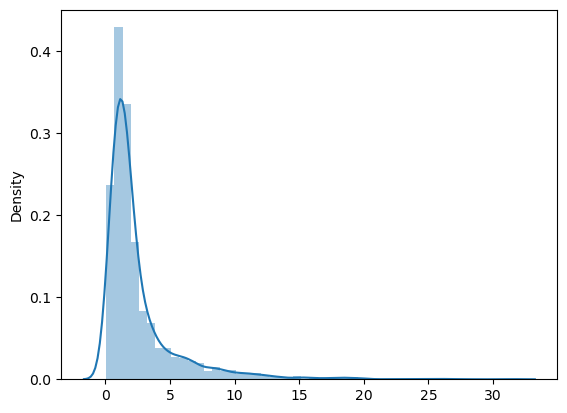

In [383]:
#Outliers on in Price Column
sns.distplot(x=df['price'])

<Axes: ylabel='price'>

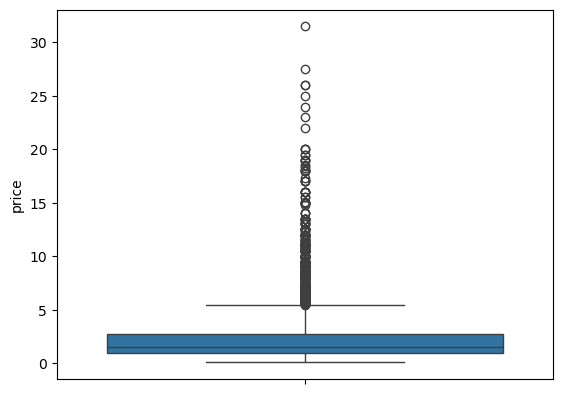

In [384]:
#Since it is not normal distributed, lets check with boxplot
sns.boxplot(df['price'])

In [385]:
#Calculate the IOR for 'price'

Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price']<lower_bound)|(df['price']>upper_bound)]

In [386]:
outliers.shape

(425, 22)

In [387]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

In [388]:
outliers.sort_values(['price'],ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,luxury_score
2437,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7.0,9.0,3+,3.0,North-East,Moderately Old,NaN,9000.00,NaN,1,1,1,1,0,33.0
1786,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.00,NaN,1,1,1,0,1,49.0
1778,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,4.0,North-West,New Property,NaN,402.00,NaN,1,1,1,1,0,49.0
1448,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,4545.00,NaN,1,1,1,0,1,79.0
1618,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4.0,4.0,3+,2.0,North,Moderately Old,NaN,1000.00,NaN,1,1,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8.0,7.0,3+,3.0,East,Moderately Old,NaN,215.00,NaN,1,1,1,0,1,13.0
3455,flat,bptp freedom park life,sector 57,5.50,8982.0,6123.0,Built Up area: 5010 (465.44 sq.m.),5.0,6.0,3+,1.0,East,Moderately Old,NaN,NaN,NaN,0,1,1,0,0,0.0
3665,house,dlf city phase 1,sector 26,5.50,30556.0,1800.0,Plot area 200(167.23 sq.m.),4.0,4.0,3+,2.0,East,Moderately Old,NaN,1800.00,NaN,0,0,1,1,0,NaN
3362,flat,experion windchants,sector 112,5.49,11584.0,4739.0,Super Built up area 4739(440.27 sq.m.)Built Up...,4.0,5.0,3+,5.0,South,Relatively New,4739.0,3655.35,NaN,0,1,0,0,0,23.0


### on the basis of price col we can say that there are some genuine outliers but there are some data erros as well


In [390]:
outliers.to_csv('Outlier_Detection.csv',index=False)

### price_per_sqft

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_41539/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

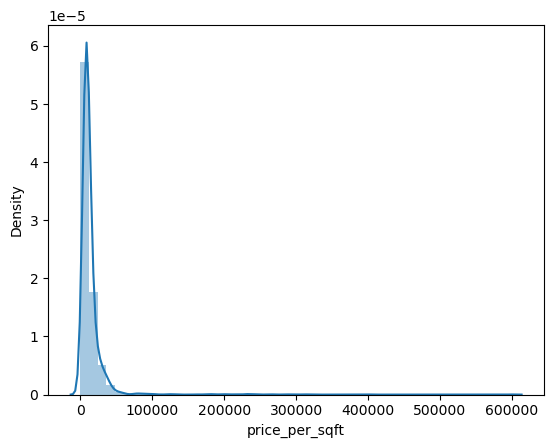

In [392]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

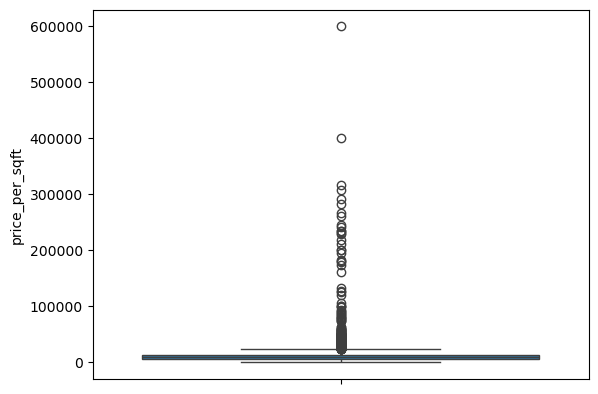

In [393]:
sns.boxplot(df['price_per_sqft'])

In [394]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_ppsqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]


In [395]:
outliers_ppsqft.shape

(353, 22)

In [396]:
outliers_ppsqft['price_per_sqft'].describe()

count       353.000000
mean      52672.226629
std       61218.883253
min       24500.000000
25%       28233.000000
50%       33404.000000
75%       42032.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [397]:
#There's a big data error for area column which is in square yards < 1000...so will multiply with *9
outliers_ppsqft['area'] = outliers_ppsqft['area'].apply(lambda x:x*9 if x<1000 else x)

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_41539/1109325038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_ppsqft['area'] = outliers_ppsqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [398]:
#lets calc the price_per_sqft column again by dividing with the new calc area
outliers_ppsqft['price_per_sqft'] = round((outliers_ppsqft['price']*10000000)/outliers_ppsqft['area'])

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_41539/3467130515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_ppsqft['price_per_sqft'] = round((outliers_ppsqft['price']*10000000)/outliers_ppsqft['area'])


In [399]:
outliers_ppsqft['price_per_sqft'].describe()

count      353.000000
mean     29371.696884
std      12417.964865
min       2723.000000
25%      25562.000000
50%      29880.000000
75%      35556.000000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [400]:
df.update(outliers_ppsqft)

In [401]:
df['price_per_sqft'].max()

82540.0

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_41539/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

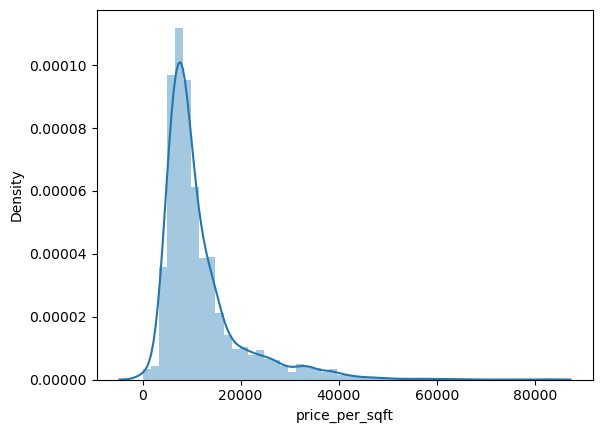

In [402]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

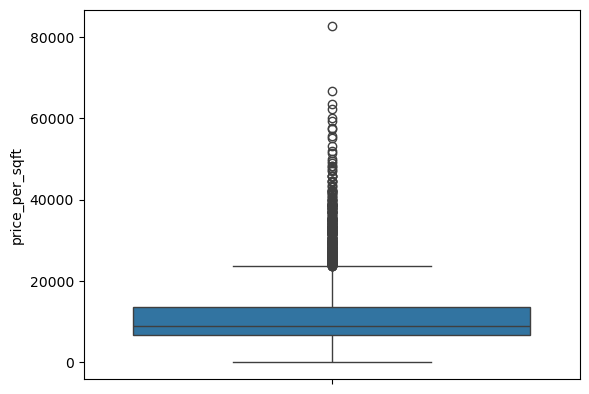

In [403]:
sns.boxplot(df['price_per_sqft'])

In [404]:
#Next will check again for area > 500000
df[df['price_per_sqft']>50000].shape

(13, 22)

In [405]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: ylabel='price_per_sqft'>

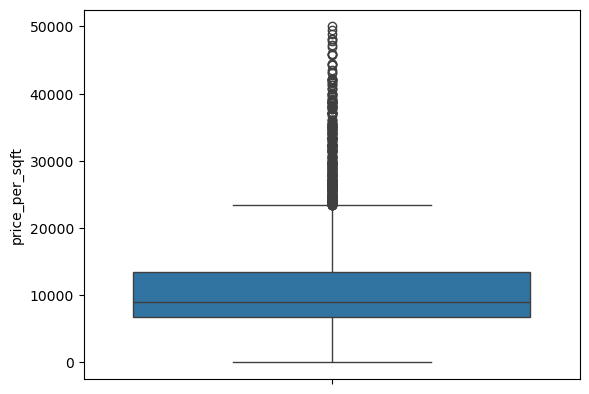

In [406]:
sns.boxplot(df['price_per_sqft'])

### Area

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_41539/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

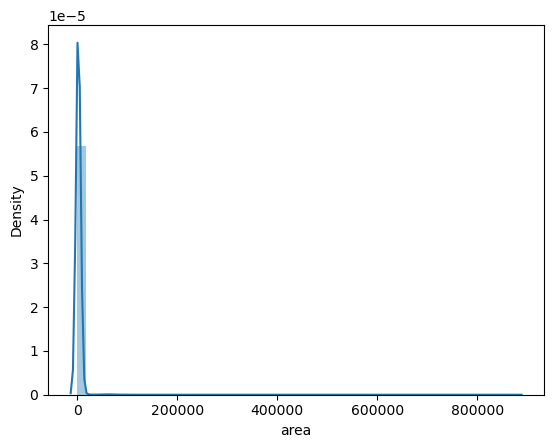

In [408]:
sns.distplot(df['area'])

<Axes: ylabel='area'>

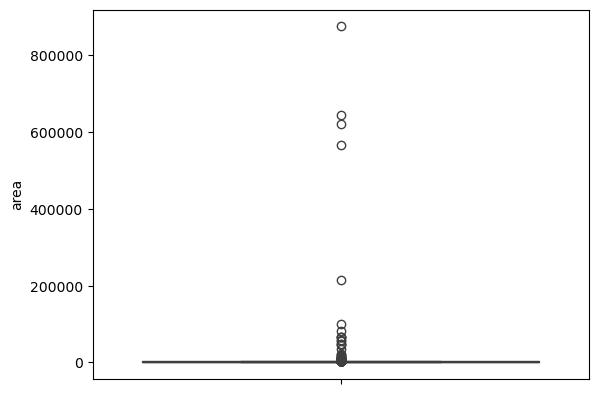

In [409]:
sns.boxplot(df['area'])

In [410]:
df['area'].describe()

count      3650.000000
mean       2946.621644
std       23198.686061
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2348.500000
max      875000.000000
Name: area, dtype: float64

In [411]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,luxury_score
293,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,NaN,0,0,0,0,0,0.0
781,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,1,0,1,80.0
2765,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,NaN,1,0,0,0,1,0.0
3006,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,NaN,NaN,0,0,0,0,0,31.0
3468,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,NaN,0,0,0,0,0,65.0


In [412]:
df = df[df['area']< 100000]

In [413]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 1485, 1534, 2875, 1821, 1924, 3571, 2908,

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,luxury_score
2286,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,502.0,NaN,0,1,1,1,0,174.0
1255,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,165.0
1485,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,1.0,North,Relatively New,NaN,NaN,NaN,0,0,0,0,0,102.0
1534,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,1.0,East,New Property,NaN,NaN,NaN,1,0,0,0,0,113.0
265,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,NaN,0,0,0,0,0,0.0
2875,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,NaN,0,0,0,0,0,31.0
1821,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,1.0,South-West,Relatively New,NaN,NaN,NaN,0,0,0,0,0,49.0
1924,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,NaN,1,0,0,0,0,114.0
368,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,215.0,NaN,0,1,0,1,0,79.0
3571,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,1.0,North-West,Relatively New,NaN,NaN,NaN,0,0,0,0,1,NaN


In [414]:
df.drop(index=[1485, 1534, 2875, 1821, 1924, 3571, 2908], inplace=True)

In [415]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,luxury_score
2286,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,502.0,NaN,0,1,1,1,0,174.0
1255,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,165.0
265,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,NaN,0,0,0,0,0,0.0
368,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,215.0,NaN,0,1,0,1,0,79.0
2146,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9.0,3+,3.0,North-East,New Property,NaN,3100.0,NaN,0,1,0,0,0,0.0
1456,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8.0,7.0,3+,3.0,East,Moderately Old,NaN,215.0,NaN,1,1,1,0,1,13.0
3144,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,1.0,North-East,Undefined,NaN,NaN,NaN,1,0,1,0,1,128.0
690,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3.0,3.0,1,2.0,North-East,Moderately Old,NaN,240.0,NaN,0,1,0,0,0,60.0
1562,house,independent,sector 4,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3.0,3.0,1,1.0,North,Relatively New,NaN,13500.0,NaN,0,0,0,0,1,158.0
1351,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3.0,3.0,3+,6.0,NaN,New Property,NaN,NaN,NaN,0,0,0,0,0,0.0


In [416]:
df.loc[1255,'area'] = 115*9
df.loc[265,'area'] = 7250
df.loc[368,'area'] = 5800
df.loc[2146,'area'] = 2660
df.loc[1456,'area'] = 2850
df.loc[3144,'area'] = 1812
df.loc[690,'area'] = 2160
df.loc[1351,'area'] = 1175

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_41539/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

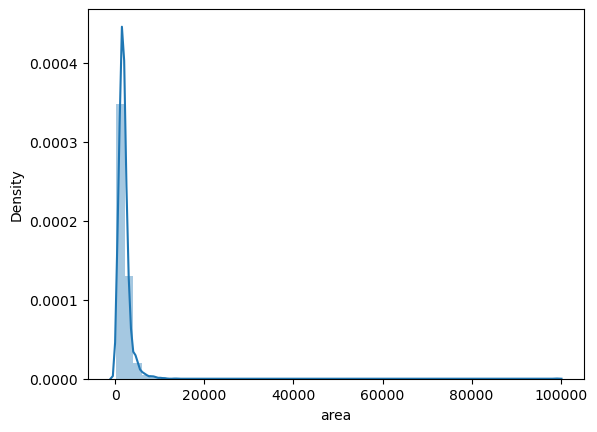

In [417]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

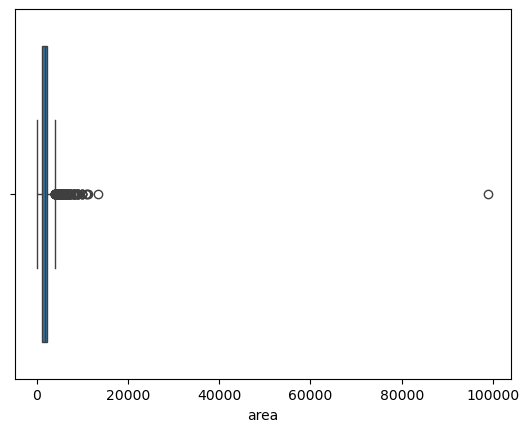

In [418]:
sns.boxplot(x=df['area'])

### Bedroom

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_41539/1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

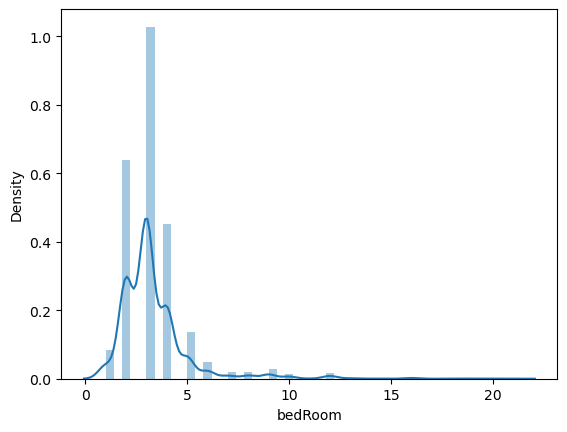

In [464]:
sns.distplot(df['bedRoom'])

<Axes: ylabel='bedRoom'>

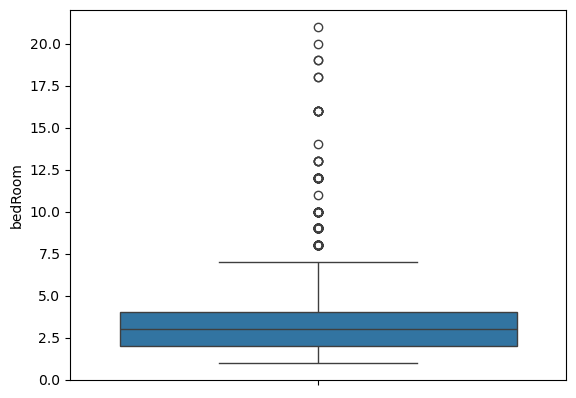

In [466]:
sns.boxplot(df['bedRoom'])

In [468]:
df['bedRoom'].describe()

count    3638.000000
mean        3.333975
std         1.829344
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [476]:
df[df['bedRoom']>10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,luxury_score
44,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,49.0
2285,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,16.0
2178,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,5.0,North-West,Relatively New,NaN,1623.0,NaN,1,0,0,1,0,20.0
3545,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,4.0,North-West,Relatively New,NaN,1623.0,NaN,1,1,1,1,0,0.0
1334,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,56.0
2975,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,0.0
1791,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,Plot area 500(418.06 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,0.0
2766,house,independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16.0,16.0,3+,4.0,South,Relatively New,NaN,1800.0,NaN,0,0,0,0,0,44.0
1211,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,2,4.0,West,New Property,NaN,2700.0,NaN,0,1,1,0,0,125.0
525,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16.0,16.0,3+,4.0,North-West,Relatively New,NaN,2700.0,NaN,1,1,1,0,1,57.0


In [480]:
df = df[df['bedRoom']<10]

In [482]:
df.shape

(3573, 22)

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_41539/1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

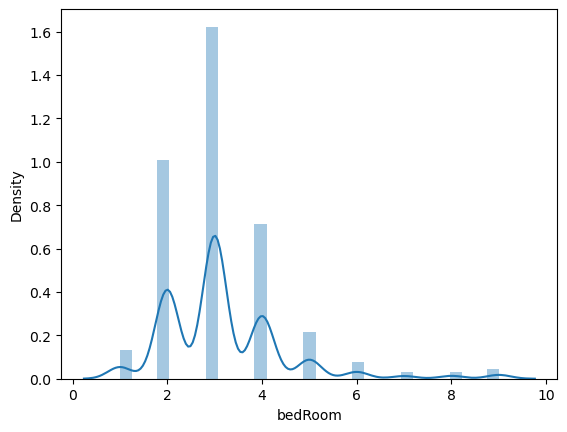

In [484]:
sns.distplot(df['bedRoom'])

<Axes: ylabel='bedRoom'>

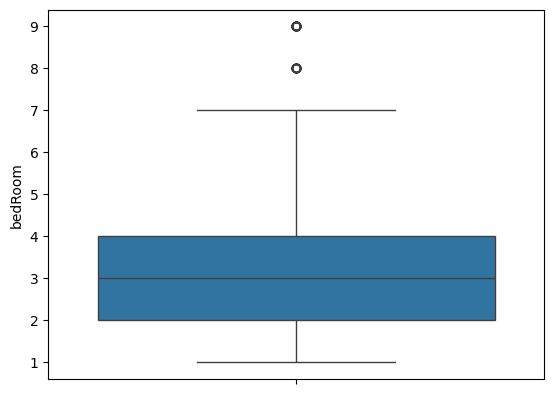

In [486]:
sns.boxplot(df['bedRoom'])

### Bathroom

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_41539/2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

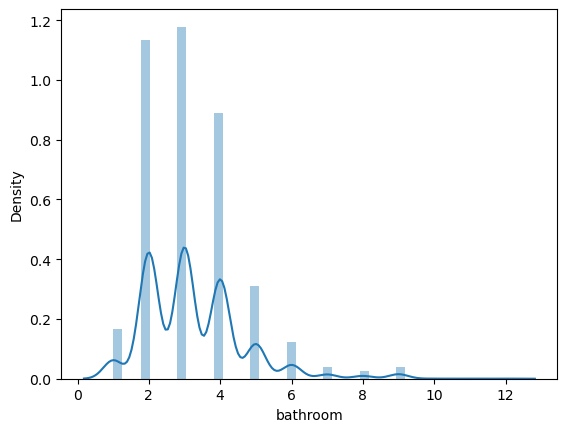

In [489]:
sns.distplot(df['bathroom'])

<Axes: ylabel='bathroom'>

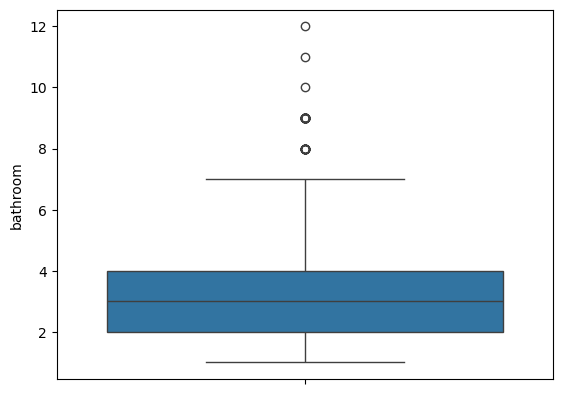

In [491]:
sns.boxplot(df['bathroom'])

In [493]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,luxury_score
979,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,NaN,NaN,0,1,0,0,0,43.0
2602,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,3806.45,NaN,1,1,1,0,1,152.0


### SuperBuiltUpArea

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_41539/4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

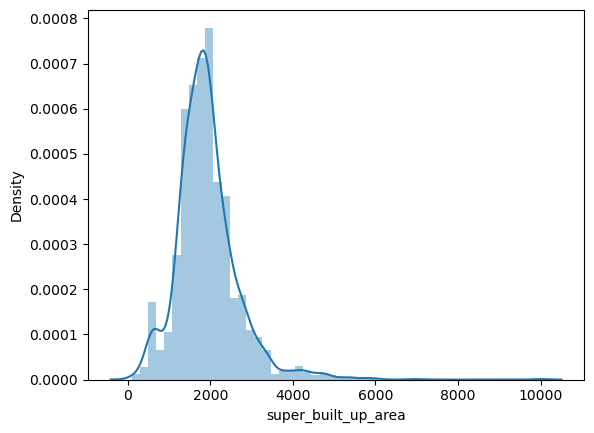

In [496]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

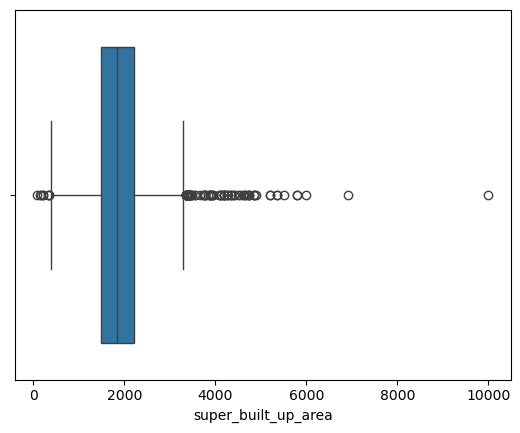

In [498]:
sns.boxplot(x=df['super_built_up_area'])

In [500]:
df['super_built_up_area'].describe()

count     1876.000000
mean      1924.557862
std        764.535501
min         89.000000
25%       1478.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [502]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,luxury_score
509,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,1.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,35.0
3658,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,2.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,1,0,1,NaN


/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_41539/2846228355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

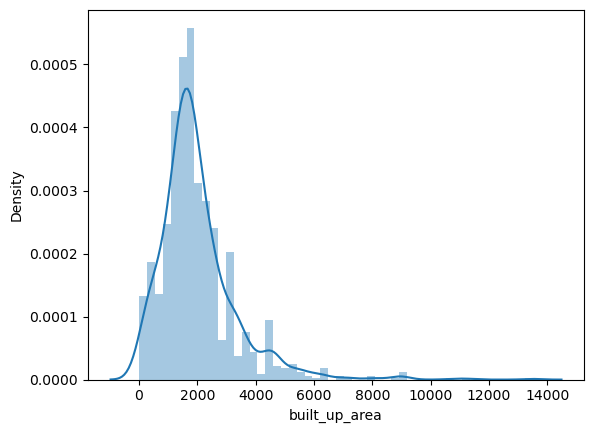

In [504]:
sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area'>

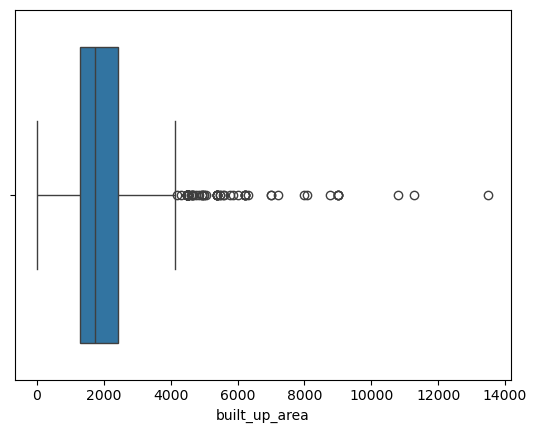

In [506]:
sns.boxplot(x=df['built_up_area'])


In [508]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,luxury_score
1562,house,independent,sector 4,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3.0,3.0,1,1.0,North,Relatively New,NaN,13500.0,NaN,0,0,0,0,1,158.0
1786,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,1,0,1,49.0
2747,house,independent,sohna road road,5.50,5093.0,10799.0,Plot area 1200(1003.35 sq.m.)Built Up area: 35...,3.0,3.0,3+,2.0,West,Moderately Old,NaN,10800.0,NaN,1,1,1,0,1,142.0


/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_41539/3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

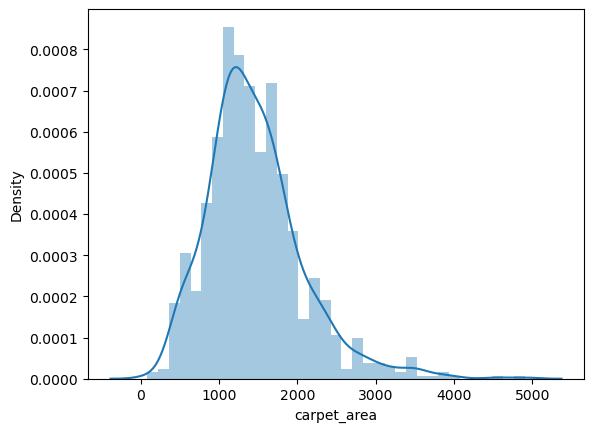

In [510]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

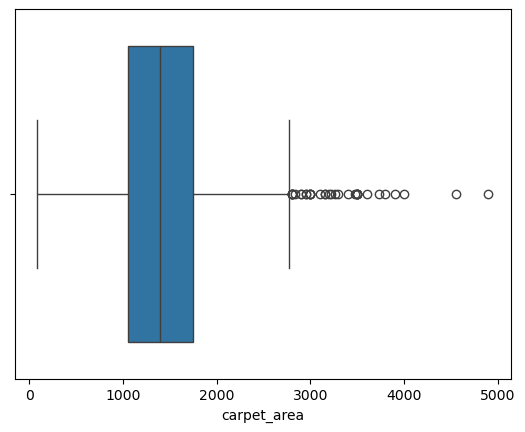

In [512]:
sns.boxplot(x=df['carpet_area'])

In [514]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,luxury_score


/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_41539/3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

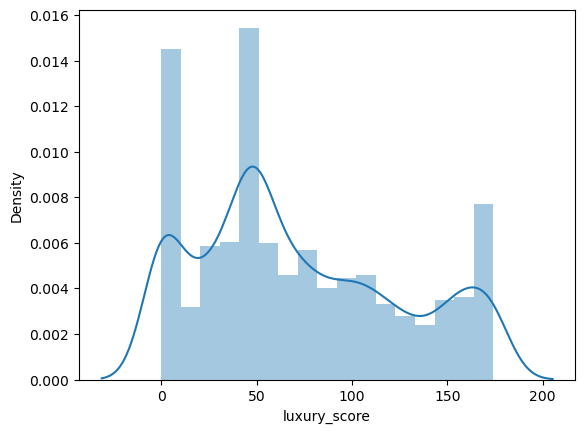

In [516]:
sns.distplot(df['luxury_score'])

<Axes: ylabel='luxury_score'>

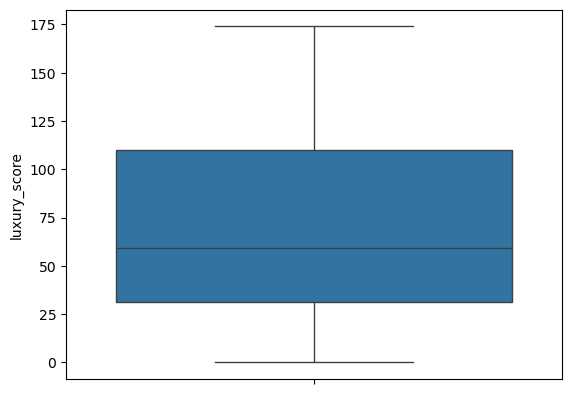

In [518]:
sns.boxplot(df['luxury_score'])

In [520]:
df.shape

(3573, 22)

In [522]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [524]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,luxury_score
0,flat,signature global park,sohna road,0.55,7353.0,748.0,Carpet area: 745 (69.21 sq.m.),2.0,2.0,3,4.0,East,New Property,NaN,NaN,NaN,0,0,0,0,0,80.0
1,flat,emaar mgf palm hills,sector 77,1.50,12744.0,1177.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,3.0,3.0,3,4.0,North-East,Relatively New,1450.0,NaN,1177.00,0,0,0,0,0,97.0
2,house,vatika india next,sector 83,1.70,7870.0,2160.0,Plot area 240(200.67 sq.m.),3.0,3.0,3+,4.0,North-West,New Property,NaN,2160.0,NaN,0,1,1,0,0,0.0
3,flat,la vida by tata housing,sector 113,1.45,11364.0,1276.0,Super Built up area 1276(118.54 sq.m.)Carpet a...,2.0,2.0,2,6.0,South,Relatively New,1276.0,NaN,904.01,0,0,0,0,0,80.0
4,flat,dlf new town heights,sector 90,1.90,5684.0,3343.0,Super Built up area 2727(253.35 sq.m.),4.0,4.0,3+,7.0,North-West,Relatively New,2727.0,NaN,NaN,0,1,1,0,0,88.0


/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_41539/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

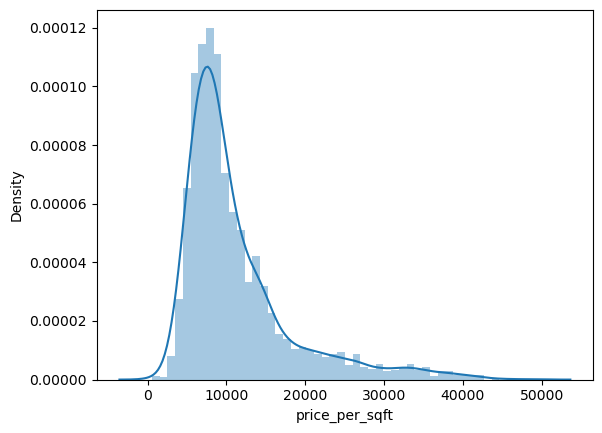

In [526]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

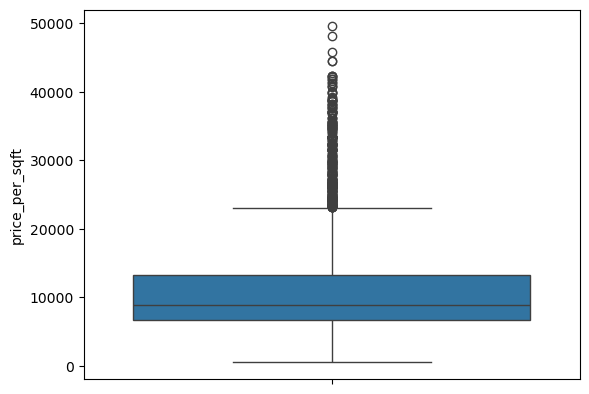

In [528]:
sns.boxplot(df['price_per_sqft'])

In [530]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,luxury_score
137,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,60.0
167,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,121.0
178,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,NaN,NaN,0,0,0,0,0,0.0
2025,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,302.0,NaN,0,1,1,0,0,81.0
2300,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,23.0
2310,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,1,0,0,49.0
3418,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,1,0,0,7.0
3453,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,141.0
3552,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,1125.0,NaN,0,0,0,0,1,158.0


In [532]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

195.33599999999998

In [534]:
df[(df['area']/df['bedRoom'])<183]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,luxury_score
36,house,independent,sector 105,0.55,10913.0,504.0,Built Up area: 56 (5.2 sq.m.),4.0,4.0,0,2.0,NaN,Undefined,NaN,NaN,NaN,0,0,0,0,0,0.0
284,house,independent,sector 47,0.99,17188.0,576.0,Plot area 64(53.51 sq.m.),4.0,4.0,3,4.0,NaN,Relatively New,NaN,576.0,NaN,0,0,0,0,0,42.0
322,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9.0,4.0,3,1.0,South,Undefined,NaN,NaN,NaN,0,0,0,0,0,21.0
373,house,independent,sector 105,0.60,13333.0,450.0,Built Up area: 450 (41.81 sq.m.),3.0,3.0,0,3.0,NaN,Undefined,NaN,NaN,NaN,0,0,0,0,0,123.0
398,house,jacob pura,sector 12,0.35,9722.0,360.0,Built Up area: 360 (33.45 sq.m.),2.0,1.0,0,NaN,NaN,Old Property,NaN,NaN,NaN,0,0,0,0,0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552,house,independent,sector 55,5.00,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,1125.0,NaN,0,0,0,0,1,158.0
3560,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8.0,8.0,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0,0,0,0,0,82.0
3597,house,independent,sector 6,0.50,13889.0,360.0,Plot area 40(33.45 sq.m.),5.0,3.0,3,3.0,NaN,Old Property,NaN,360.0,NaN,0,0,0,0,0,NaN
3627,house,prem kunj,sohna road road,0.50,7407.0,675.0,Plot area 675(62.71 sq.m.)Built Up area: 725 s...,5.0,4.0,3,3.0,South-West,Relatively New,NaN,675.0,NaN,0,0,1,0,0,NaN
